In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

In [106]:
df_original = pd.read_csv(
    "./datasets/sales.csv",
    sep=None, 
    engine='python'
)

Data preparation

In [107]:
df = df_original.copy()

In [108]:
df.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,NaN,1,680,680,172,3,2 017,NaN,Возврат,Москва,508,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,NaN,1,379,379,"209,8",3,2 017,23111,Доставлен,Регионы,"169,2",0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,NaN,1,3 325,3 325,1 149,3,2 017,23111,Доставлен,Регионы,2 176,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,NaN,1,330,330,"166,96",3,2 017,NaN,Доставлен,Москва,"163,04",0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,NaN,1,199,199,79,3,2 017,23111,Доставлен,Регионы,120,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN


In [109]:
#вычисляем количество уникальных значений, количество нулей, количество пропусков, процент пропусков и тип данных
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column                   |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------------+----------------+---------------+--------------+-------------+-------------|
| Дата                     |          28887 |             0 |            0 |         0   | object      |
| ДатаДоставки             |            107 |             0 |          626 |         0.1 | object      |
| НомерЗаказаНаСайте       |         178418 |             0 |            4 |         0   | object      |
| НовыйСтатус              |             14 |             0 |            0 |         0   | object      |
| СуммаЗаказаНаСайте       |          14316 |             0 |            0 |         0   | object      |
| СуммаДокумента           |          14747 |             0 |            0 |         0   | object      |
| МетодДоставки            |              7 |             0 |            0 |         0   | object      |
| ФормаОплаты              |              2 |          

In [110]:
df = df.drop(columns=['ЭлектроннаяПочта_new'])

In [111]:
df.shape

(691539, 37)

In [112]:
#удаляем ряды без номеров
df = df.loc[df['Телефон_new'] != '0']

In [113]:
df.shape

(684695, 37)

In [114]:
#удаляем ненужные для анализа столбцы
df = df.drop(columns=['Дата', 'ДатаДоставки', 'СуммаДокумента', 'ЦенаЗакупки', 'ГодДатыЗаказа', 'ПВЗ_код', 'СуммаУслуг', 'СуммаДоставки', 'НомерСтроки',
                      'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте', 'Клиент', 'ID_SKU', 'ГородМагазина', 'МагазинЗаказа', 'СуммаЗаказаНаСайте', 'Гео', 'ПричинаОтмены'])

In [115]:
df.head()

,НомерЗаказаНаСайте,НовыйСтатус,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,СуммаСтроки,МесяцДатыЗаказа,Статус,Маржа,Телефон_new
0,3998972_TR,Частичный возврат,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,1,680,680,3,Возврат,508,55574854-48574951555577
1,3999117_TR,Доставлен,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,1,379,379,3,Доставлен,"169,2",55575453-56535648535679
2,3999122_TR,Доставлен,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,1,3 325,3 325,3,Доставлен,2 176,55574950-57515657535772
3,3999363_TR,К отгрузке,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,1,330,330,3,Доставлен,"163,04",55574851-55545249535475
4,3999411_TR,Доставлен,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,1,199,199,3,Доставлен,120,55574854-56495552515179


In [116]:
df.shape

(684695, 19)

In [117]:
#вычисляем количество уникальных значений, количество нулей, количество пропусков, процент пропусков и тип данных
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data_3 = []
for column in df:
    data_3.append([column] + columnValues(df[column]))

print(tabulate(data_3, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column             |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------+----------------+---------------+--------------+-------------+-------------|
| НомерЗаказаНаСайте |         176149 |             0 |            0 |         0   | object      |
| НовыйСтатус        |             14 |             0 |            0 |         0   | object      |
| МетодДоставки      |              7 |             0 |            0 |         0   | object      |
| ФормаОплаты        |              2 |             0 |            0 |         0   | object      |
| Регион             |            507 |             0 |         5118 |         0.7 | object      |
| Группа2            |             13 |             0 |        73768 |        10.8 | object      |
| Группа3            |             93 |             0 |        73768 |        10.8 | object      |
| Группа4            |            411 |             0 |       104498 |        15.3 | object      |
| Тип     

In [118]:
#убираем отмененные заказы
df = df.loc[df['Отменено'] != 'Да']

In [119]:
df.shape

(618391, 19)

In [120]:
df.Статус.unique()

array(['Возврат', 'Доставлен', 'В процессе', 'Отменен', 'Не определен'],
      dtype=object)

In [121]:
df = df.loc[~df['Статус'].isin(['Не определен'])]

In [122]:
df = df.dropna(subset=['Регион'])

In [123]:
#Заменяем названия городов Центрального ф.о
df['Регион'] = df['Регион'].replace([
    'Москва', 'Белгород', 'Владимир', 'Воронеж', 'Иваново', 'Калуга', 'Кострома', 'Курск', 
    'Липецк', 'Люберцы', 'Мытищи', 'Подольск', 'Рязань', 'Сергиев Посад', 'Серпухов', 
    'Смоленск', 'Тамбов', 'Тверь', 'Тула', 'Ярославль', 'Брянск', 'Орёл', 'Елец', 'Моршанск', 'Лиски',
    'Подольск (Московская область район)', 'Красногорск (Красногорский район)', 
    'Красково (Люберецкий район)', 'Клин (Клинский район)', 
    'Королев (Московская область район)', 'Железнодорожный (Московская область район)',
    'Балашиха (Балашихинский район)', 'Электросталь (Московская область район)',
    'Люберцы (Люберецкий район)', 'Химки (Московская область район)',
    'Жуковский (Московская область район)', 'Сергиев Посад (Сергиево-Посадский район)',
    'Дмитров (Дмитровский район)', 'Одинцово (Одинцовский район)',
    'Ногинск (Ногинский район)', 'Орехово-Зуево (Московская область район)',
    'Видное (Ленинский район)', 'Котельники (Люберецкий район)',
    'Мытищи (Мытищинский район)', 'Реутов (Московская область район)',
    'Долгопрудный (Московская область район)', 'Лобня (Московская область район)',
    'Троицк (ГП Москва)', 'Малаховка (Люберецкий район)', 'Дубна (Московская область район)',
    'Можайск (Можайский район)', 'Путилково (Красногорский район)',
    'Дзержинский (Московская область район)', 'Жостово (Мытищинский район)',
    'Истра (Красногорский район)', 'Коломна (Московская область район)',
    'Калининец (Наро-Фоминский район)', 'Щелково (Московская область район)',
    'Раменское (Раменский район)', 'Обухово (Ногинский район)',
    'Михайловка (Раменский район)', 'Электроизолятор (Раменский район)',
    'Жуково (Раменский район)', 'Суханово (Ленинский район)',
    'Константиново (Раменский район)', 'Марушкино (Наро-Фоминский район)',
    'Чиверево (Мытищинский район)','Десногорск','Ковров','Алексин', 'Зеленоград',
    'Сокол', 'Обнинск', 'Борисоглебск', 'Нововоронеж', 'Переславль-Залесский',
    'Вичуга', 'Гаврилов-Ям', 'Рыбинск', 'Кольчугино', 'Редкино (Тверская область)',
    'Мичуринск', 'Россошь', 'Судогда', 'Семилуки', 'Торжок', 'Приволжск', 'Александров',
    'Юрьевец', 'Железногорск', 'Шебекино', 'Вязьма', 'Балабаново', 'Новомичуринск',
    'Павловск (Воронежская обл.)', 'Буй', 'Сухиничи', 'Муром'
], 'Центральный ф.о.')



In [124]:
#добираем оставшиеся города Московского региона
df['Регион'] = df['Регион'].apply(
    lambda x: 'Центральный ф.о.' if isinstance(x, str) and ('москов' in x.lower() or 'район' in x.lower()) 
    else x
)

In [125]:
#заменяем названия городов Северо-Кавказского ф.о.
df['Регион'] = df['Регион'].replace([
    'Каспийск', 'Зеленокумск', 'Железноводск', 'Ессентуки', 
    'Изобильный', 'Георгиевск', 'Светлоград', 'Буйнакск', 
    'Минеральные Воды'
], 'Северо-Кавказский ф.о.')

In [126]:
#заменяем названия городов Северо-Западного ф.о.
df['Регион'] = df['Регион'].replace([
    'Великий Новгород', 'Вологда', 'Воркута', 'Всеволожск', 
    'Выборг', 'Гатчина', 'Кингисепп', 'Кириши', 'Колпино', 
    'Мурманск', 'Петрозаводск', 'Псков', 'Пушкин', 
    'Санкт-Петербург', 'Тихвин', 'Череповец', 'Архангельск', 
    'Полярные Зори', 'Сыктывкар', 'Ухта', 'Апатиты',
    'Калининград', 'Бокситогорск', 'Североморск', 'Заполярный', 
    'Сестрорецк', 'Сосновый Бор', 'Петергоф', 'Усинск', 
    'Кировск (Мурманская область)', 'Остров', 'Костомукша', 
    'Мурмаши (Мурманская область)', 'Кандалакша', 'Сортавала', 
    'Великие Луки', 'Красное Село', 'Сертолово', 'Печора', 
    'Оленегорск', 'Гусев', 'Северодвинск', 'Кола'
    'Кировск (Ленинградская область)', 'Осиновая роща',
    'Тосно', 'Печенга (Мурманская область)', 'Мирный (Архангельская область)', 'Кола', 
    'Кировск (Ленинградская область)'
], 'Северо-Западный ф.о.')

In [127]:
#заменяем названия городов Приволжского ф.о.
df['Регион'] = df['Регион'].replace([
    'Ижевск', 'Казань', 'Набережные Челны', 'Нижний Новгород', 'Новокуйбышевск', 'Пенза', 
    'Пермь', 'Самара', 'Саратов', 'Тольятти', 'Ульяновск', 'Уфа', 'Чебоксары', 'Оренбург',
    'Чайковский', 'Орск', 'Киров', 'Стерлитамак', 'Йошкар-Ола', 'Старый Оскол','Балаково',
    'Медногорск', 'Дзержинск', 'Саранск', 'Бузулук', 'Димитровград', 'Можга', 'Энгельс',
    'Березники', 'Жигулёвск', 'Ишимбай', 'Арзамас', 'Лысьва', 'Кстово', 'Кунгур',
    'Павлово (Нижегородская область)', 'Мелеуз', 'Вольск', 'Сызрань', 'Шумерля',
    'Балахна', 'Зеленодольск', 'Воткинск', 'Саров', 'Глазов', 'Соликамск', 'Волжск',
    'Кирово-Чепецк', 'Цивильск', 'Полазна (Пермский край)', 'Нефтекамск', 'Ворсма',
    'Слободской', 'Чусовой', 'Шиханы', 'Кизел'
], 'Приволжский ф.о.')

In [128]:
#заменяем названия городов Сибирского ф.о.
df['Регион'] = df['Регион'].replace([
    'Барнаул', 'Новосибирск', 'Омск', 'Томск', 'Красноярск', 'Иркутск', 'Кемерово',
    'Горно-Алтайск', 'Улан-Удэ', 'Кызыл', 'Абакан',
    'Новокузнецк', 'Братск', 'Ангарск', 'Норильск', 'Анжеро-Судженск', 'Прокопьевск',
    'Ленинск-Кузнецкий', 'Междуреченск', 'Северск', 'Ачинск', 'Канск', 'Зеленогорск',
    'Бийск', 'Рубцовск', 'Новоалтайск', 'Бердск', 'Искитим', 'Киселевск', 'Юрга',
    'Северобайкальск', 'Усолье-Сибирское', 'Черемхово', 'Минусинск', 'Кызыл',
    'Чита', 'Новоуральск', 'Ангарск', 'Братск', 'Абакан',
    'Усолье-Сибирское', 'Братск', 'Ангарск', 'Норильск', 'Ачинск', 'Канск',
    'Минусинск', 'Горно-Алтайск', 'Кызыл', 'Улан-Удэ', 'Мыски', 'Лесосибирск',
    'Усть-Кут', 'Сосновоборск', 'Усть-Илимск', 'Нижнеудинск', 'Асино',
    'Железногорск-Илимский', 'Гусиноозерск', 'Топки', 'Белово'
], 'Сибирский ф.о.')

In [129]:
#заменяем названия городов Южного ф.о.
df['Регион'] = df['Регион'].replace([
    'Волгоград', 'Краснодар', 'Новочеркасск', 'Пятигорск', 'Ростов-на-Дону', 'Сочи', 
    'Ставрополь', 'Волжский', 'Таганрог', 'Адлер', 'Камышин', 'Астрахань',
    'Благовещенск', 'Грозный', 'Махачкала', 'Нальчик', 'Черкесск', 'Владикавказ',
    'Майкоп', 'Элиста', 'Симферополь', 'Севастополь','Новороссийск', 'Армавир',
    'Туапсе', 'Анапа', 'Шахты', 'Крымск', 'Тихорецк', 'Красный Сулин', 'Приморско-Ахтарск',
    'Темрюк', 'Каменск-Шахтинский', 'Ейск', 'Абинск', 'Урюпинск', 'Азов', 'Миллерово', 'Лабинск',
    'Геленджик', 'Горячий Ключ', 'Жирновск', 'Батайск', 'Каневская (Краснодарский край)',
    'Белая Калитва', 'Сальск', 'Гулькевичи', 'Новопокровская (Краснодарский край)', 'Волгодонск',
    'Новокубанск', 'Северская (Краснодарский край)', 'Апшеронск', 'Славянск-на-Кубани', 'Изобильный',
    'Семикаракорск', 'Белореченск', 'Зерноград', 'Майский', 'Тимашёвск', 'Котельниково', 'Кисловодск'
], 'Южный ф.о.')

In [130]:
#заменяем названия городов Уральского ф.о.
df['Регион'] = df['Регион'].replace([
    'Екатеринбург', 'Нижневартовск', 'Нижний Тагил', 'Ноябрьск', 'Сургут', 'Тюмень', 
    'Челябинск', 'Ханты-Мансийск', 'Магнитогорск', 'Златоуст', 'Миасс', 'Курган',
    'Салават', 'Нижнекамск', 'Стерлитамак', 'Тобольск', 'Каменск-Уральский', 'Первоуральск',
    'Нижняя Тура', 'Сатка', 'Лесной', 'Алапаевск', 'Заречный (Свердловская область)', 'Лангепас',
    'Качканар', 'Нефтеюганск', 'Ревда', 'Березовский', 'Радужный (ХМАО)', 'Лянтор',
    'Касли', 'Белоярский', 'Реж', 'Среднеуральск', 'Надым', 'Троицк (Челябинская область)',
    'Чебаркуль'
], 'Уральский ф.о.')

In [131]:
#заменяем названия городов Дальневосточного ф.о.
df['Регион'] = df['Регион'].replace([
    'Владивосток', 'Хабаровск', 'Якутск', 'Благовещенск', 'Петропавловск-Камчатский',
    'Южно-Сахалинск', 'Магадан', 'Анадырь', 'Уссурийск', 'Комсомольск-на-Амуре',
    'Находка', 'Артем', 'Нерюнгри', 'Мирный', 'Краснокаменск', 'Белогорск', 'Большой Камень',
    'Елизово'
], 'Дальневосточный ф.о.')

In [132]:
#посмотрим уникальные значения получившихся Регионов
df.Регион.unique()

array(['Центральный ф.о.', 'Уральский ф.о.', 'Приволжский ф.о.',
       'Южный ф.о.', 'Сибирский ф.о.', 'Северо-Западный ф.о.',
       'Дальневосточный ф.о.', 'Северо-Кавказский ф.о.'], dtype=object)

In [133]:
df.shape

(613282, 19)

In [134]:
#переименуем столбцы для удобства
df = df.rename(columns={'Группа2': 'Группа1', 'Группа3': 'Группа2', 'Группа4': 'Группа3'})

In [135]:
#посмотрим уникальные значения Группы1
df.Группа1.unique()

array(['КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ИГРУШКИ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ОБУВЬ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
       'ПОДГУЗНИКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'КОСМЕТИКА/ГИГИЕНА',
       'ЖЕНСКИЕ ШТУЧКИ', 'ДЕТСКОЕ ПИТАНИЕ', nan, 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
       'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'], dtype=object)

In [136]:
#посмотрим уникальные значения Группы2
df.Группа2.unique()

array(['КОЛЯСКИ', 'ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)',
       'ИГРУШКИ ДЛЯ ДЕВОЧЕК', 'ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ',
       'КОНСТРУКТОРЫ', 'ДЕТСКАЯ ОДЕЖДА (2-6 лет)', 'КАНЦТОВАРЫ',
       'КАТАЛКИ/КАЧАЛКИ', 'ПОСТЕЛЬНОЕ БЕЛЬЕ', 'ДЕТСКОЕ БЕЛЬЁ',
       'ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ', 'ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ',
       'ДЕТСКИЕ КОЛГОТКИ И НОСКИ', 'ОБУВЬ ДЕТСКАЯ',
       'КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК', 'ДЕТСКАЯ ОДЕЖДА (7-16 лет)',
       'ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ', 'ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА',
       'СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ', 'АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК',
       'ИГРУШКИ ДЛЯ МАЛЬЧИКОВ', 'СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ',
       'АВТОКРЕСЛА', 'ВЕЛОСИПЕДЫ/САМОКАТЫ', 'ПОДГУЗНИКИ',
       'ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ', 'БУТЫЛОЧКИ', 'СРЕДСТВА БЫТОВОЙ ХИМИИ',
       'ХОЗЯЙСТВЕННЫЕ ТОВАРЫ', 'ОДЕЖДА, ОБУВЬ', 'КОЛЯСКИ ДЛЯ КУКОЛ',
       'МАНЕЖИ/ШЕЗЛОНГИ', 'ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ', 'ПОСУДА',
       'МЯГКИЕ ИГРУШКИ', 'ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ',
       'ЭЛЕКТРОПРИБОРЫ', 'НАСТОЛЬНЫЕ И

In [137]:
#вычисляем количество уникальных значений, количество нулей, количество пропусков, процент пропусков и тип данных
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data_3 = []
for column in df:
    data_3.append([column] + columnValues(df[column]))

print(tabulate(data_3, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column             |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------+----------------+---------------+--------------+-------------+-------------|
| НомерЗаказаНаСайте |         158744 |             0 |            0 |         0   | object      |
| НовыйСтатус        |             13 |             0 |            0 |         0   | object      |
| МетодДоставки      |              6 |             0 |            0 |         0   | object      |
| ФормаОплаты        |              2 |             0 |            0 |         0   | object      |
| Регион             |              8 |             0 |            0 |         0   | object      |
| Группа1            |             13 |             0 |        72769 |        11.9 | object      |
| Группа2            |             92 |             0 |        72769 |        11.9 | object      |
| Группа3            |            409 |             0 |        99774 |        16.3 | object      |
| Тип     

In [138]:
#посмотрим когда Группа1 и Группа2 не содержит информацию
result = df[
    df['Группа1'].isna() & 
    df['Группа2'].isna()
]
print(tabulate(result.head()))

-----  ----------  ----------  ----------  -----------  ----------------  ---  ---  ---  ----  --------  ---  ---  -  ---  ---  -  ---------  ---  -----------------------
31873  3998962_TR  Доставлен   Магазины    Безналичная  Центральный ф.о.  nan  nan  nan  ИНОЕ  Доставка  nan  Нет  1   49   49  3  Доставлен  nan  55575057-53555757515473
31879  3998998_TR  Доставлен   Магазины    Безналичная  Центральный ф.о.  nan  nan  nan  ИНОЕ  Доставка  nan  Нет  1   49   49  3  Доставлен  nan  55575057-53574856545476
31890  3999056_TR  К отгрузке  Pick point  Безналичная  Центральный ф.о.  nan  nan  nan  ИНОЕ  Доставка  nan  Нет  1  180  180  3  Доставлен  nan  55574857-54545052535273
31957  3999641_TR  Доставлен   Магазины    Безналичная  Приволжский ф.о.  nan  nan  nan  ИНОЕ  Доставка  nan  Нет  1   99   99  3  Доставлен  nan  55575655-54485754524877
32028  3999665_TR  Доставлен   Магазины    Безналичная  Приволжский ф.о.  nan  nan  nan  ИНОЕ  Доставка  nan  Нет  1   99   99  3  Доставлен  nan

In [139]:
df = df.loc[df['Тип'] != 'ИНОЕ']

In [140]:
#посмотрим когда Группа2 не содержит информацию
result = df[df['Группа2'].isna()
]
print(tabulate(result.head()))

In [141]:
#заполним пустые значения Группы1 значениями Группы2
df = df.copy()
df['Группа3'] = df['Группа3'].fillna(df['Группа2'])

In [142]:
df.shape

(533126, 19)

In [143]:
numeric_cols = ['Цена', 'СуммаСтроки', 'Маржа', 'Количество']

for col in numeric_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace(',', '.', regex=False)
        .str.replace(' ', '', regex=False)
        .astype(float)
    )

In [144]:
#вычисляем количество уникальных значений, количество нулей, количество пропусков, процент пропусков и тип данных
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data_3 = []
for column in df:
    data_3.append([column] + columnValues(df[column]))

print(tabulate(data_3, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column             |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------+----------------+---------------+--------------+-------------+-------------|
| НомерЗаказаНаСайте |         150167 |             0 |            0 |         0   | object      |
| НовыйСтатус        |             13 |             0 |            0 |         0   | object      |
| МетодДоставки      |              6 |             0 |            0 |         0   | object      |
| ФормаОплаты        |              2 |             0 |            0 |         0   | object      |
| Регион             |              8 |             0 |            0 |         0   | object      |
| Группа1            |             10 |             0 |            0 |         0   | object      |
| Группа2            |             71 |             0 |            0 |         0   | object      |
| Группа3            |            380 |             0 |            0 |         0   | object      |
| Тип     

In [145]:
# Оставляем только те чеки, где два и более товара

rows_per_order = (
    df.groupby('НомерЗаказаНаСайте')
      .size()
      .reset_index(name='NumRows')
)

orders_gt2 = rows_per_order.loc[rows_per_order['NumRows'] >= 2, 'НомерЗаказаНаСайте']
df = df[df['НомерЗаказаНаСайте'].isin(orders_gt2)].copy()

In [146]:
df.shape

(463260, 19)

Calculation


In [147]:
def MeanValue(i):
    df.groupby(['НомерЗаказаНаСайте'])
    return i.mean()

In [148]:
agg_func = {'СуммаСтроки': [MeanValue, 'sum'], #Общая выручка по всем продуктам и средний чек
            'НомерЗаказаНаСайте': ['nunique'], #количество уникальных заказов
            'Телефон_new': ['nunique'], #количество уникальных заказчиков
            'Количество': [MeanValue, 'sum'], #количество товарок (среднее и общее)
            'Группа1': ['nunique'], #количество уникальных категорий в Группе1
            'Группа2': ['nunique']} #количество уникальных категорий в Группе2

In [149]:
#размещенные заказы
df_Order = df.groupby(['МесяцДатыЗаказа']).agg(agg_func)
df_Order

СуммаСтроки               НомерЗаказаНаСайте Телефон_new  \
                  MeanValue           sum            nunique     nunique   
МесяцДатыЗаказа                                                            
3                646.781581  1.457516e+08              39579       31663   
4                593.442979  1.411866e+08              40722       32125   

                Количество           Группа1 Группа2  
                 MeanValue       sum nunique nunique  
МесяцДатыЗаказа                                       
3                 1.614376  363798.0      10      70  
4                 1.565913  372548.0      10      70

In [150]:
#выкупленные товары
df_Paid = df[df['Статус'] == 'Доставлен'].groupby(['МесяцДатыЗаказа']).agg(agg_func)
df_Paid

СуммаСтроки               НомерЗаказаНаСайте Телефон_new  \
                  MeanValue           sum            nunique     nunique   
МесяцДатыЗаказа                                                            
3                572.260382  1.018772e+08              30705       25550   
4                540.161838  9.611586e+07              30489       25303   

                Количество           Группа1 Группа2  
                 MeanValue       sum nunique nunique  
МесяцДатыЗаказа                                       
3                 1.711098  304620.0      10      70  
4                 1.682301  299347.0      10      70

In [151]:
#процент выкупа
df_ProcentPaid = (df_Paid/df_Order)
df_ProcentPaid

СуммаСтроки           НомерЗаказаНаСайте Телефон_new  \
                  MeanValue       sum            nunique     nunique   
МесяцДатыЗаказа                                                        
3                  0.884782  0.698979           0.775790    0.806936   
4                  0.910217  0.680772           0.748711    0.787642   

                Количество           Группа1 Группа2  
                 MeanValue       sum nunique nunique  
МесяцДатыЗаказа                                       
3                 1.059913  0.837333     1.0     1.0  
4                 1.074326  0.803513     1.0     1.0

In [152]:
df.НовыйСтатус.unique()

array(['Частичный возврат', 'Доставлен', 'К отгрузке', 'Возврат',
       'Возврат из ПВЗ', 'Принят в ПВЗ', 'Расформирован ПВЗ', 'В резерве',
       'Скомплектован Регион', 'Отменен', 'Отправлен в ПВЗ',
       'Передан в Регион'], dtype=object)

In [153]:
#оставляем только доставленные заказы
df = df[~df['НовыйСтатус'].isin(['К отгрузке', 'Возврат',
       'Возврат из ПВЗ', 'Принят в ПВЗ', 'Расформирован ПВЗ', 'В резерве',
       'Скомплектован Регион', 'Отменен', 'Отправлен в ПВЗ',
       'Передан в Регион','Частичный возврат'])]

In [154]:
df.shape

(174918, 19)

In [155]:
df = df.drop(columns=['НовыйСтатус', 'Статус', 'МесяцДатыЗаказа', 'Отменено', 'МетодДоставки'])

In [156]:
df.shape

(174918, 14)

In [157]:
#вычисляем количество уникальных значений, количество нулей, количество пропусков, процент пропусков и тип данных
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data_3 = []
for column in df:
    data_3.append([column] + columnValues(df[column]))

print(tabulate(data_3, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column             |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------+----------------+---------------+--------------+-------------+-------------|
| НомерЗаказаНаСайте |          35683 |             0 |            0 |         0   | object      |
| ФормаОплаты        |              2 |             0 |            0 |         0   | object      |
| Регион             |              7 |             0 |            0 |         0   | object      |
| Группа1            |             10 |             0 |            0 |         0   | object      |
| Группа2            |             71 |             0 |            0 |         0   | object      |
| Группа3            |            366 |             0 |            0 |         0   | object      |
| Тип                |              4 |             0 |            0 |         0   | object      |
| Номенклатура       |          39142 |             0 |            0 |         0   | object      |
| ТипТовар

In [158]:
df_paid10 = df

In [159]:
df.describe()

,Количество,Цена,СуммаСтроки,Маржа
count,174918.000000,174918.000000,174918.000000,174458.000000
mean,1.357190,524.772797,583.920912,123.421195
std,1.637162,1199.697254,1261.661008,353.514329
min,1.000000,3.000000,3.000000,-4705.000000
25%,1.000000,89.000000,110.000000,13.640000
50%,1.000000,228.265000,253.000000,44.060000
75%,1.000000,559.000000,598.500000,125.000000
max,100.000000,56800.000000,56800.000000,15397.000000


In [160]:
df.groupby('Телефон_new').count().head()

,НомерЗаказаНаСайте,ФормаОплаты,Регион,Группа1,Группа2,Группа3,Тип,Номенклатура,ТипТовара,Количество,Цена,СуммаСтроки,Маржа
Телефон_new,,,,,,,,,,,,,
32555749-545749525150 .,5,5,5,5,5,5,5,5,5,5,5,5,5
55574848-48494948544878,11,11,11,11,11,11,11,11,11,11,11,11,11
55574848-48495057545270,3,3,3,3,3,3,3,3,3,3,3,3,3
55574848-48505057495379,2,2,2,2,2,2,2,2,2,2,2,2,2
55574848-49505155564971,3,3,3,3,3,3,3,3,3,3,3,3,3


In [161]:
#сортировка по убыванию дохода с клиента
sorted_df = df.groupby('Телефон_new').sum().sort_values(by='СуммаСтроки', ascending=False)

In [162]:
sorted_df_Quant1 = (
    df.groupby('Телефон_new')
    .agg(
        Количество=('Количество', 'sum'),
        СуммаСтроки=('СуммаСтроки', 'sum'),
        Маржа=('Маржа', 'sum')
    )
    .sort_values(['СуммаСтроки'], ascending= False)
    .reset_index()
)
sorted_df_Quant1.head(13000)

,Телефон_new,Количество,СуммаСтроки,Маржа
0,55574955-51505254485179,7.0,121955.0,30895.20
1,55575049-53565257515678,53.0,118207.0,41449.51
2,55574857-48534848515278,129.0,105904.0,28657.74
3,55574850-53545452504975,128.0,102306.0,275.25
4,55575050-52515153505570,53.0,92384.0,35459.59
...,...,...,...,...
12995,55574954-51515054505370,4.0,2494.0,368.44
12996,55575555-50545257494978,2.0,2493.0,-264.73
12997,55574851-55495456565171,16.0,2493.0,589.36
12998,55574853-55565451535270,18.0,2493.0,388.92


In [163]:
sorted_df_Quant2 = (
    df.groupby('Телефон_new')
    .agg(
        Количество=('Количество', 'sum'),
        СуммаСтроки=('СуммаСтроки', 'sum'),
        Маржа=('Маржа', 'sum')
    )
    .sort_values(['Маржа'], ascending= False)
    .reset_index()
)
sorted_df_Quant2.head(13000)

,Телефон_new,Количество,СуммаСтроки,Маржа
0,55575049-53565257515678,53.0,118207.0,41449.51
1,55575054-51575451545674,30.0,77656.0,38113.41
2,55575050-52515153505570,53.0,92384.0,35459.59
3,55574955-51505254485179,7.0,121955.0,30895.20
4,55574857-48534848515278,129.0,105904.0,28657.74
...,...,...,...,...
12995,55575650-54534949555575,7.0,7665.0,455.00
12996,55575049-57575048545677,7.0,7665.0,455.00
12997,55575651-51505151484870,10.0,4532.0,454.94
12998,55575757-57565749505772,4.0,1283.0,454.93


In [164]:
#сортивровка в порядке возрастания количества товара и суммы чека
sorted_df_Quant3 = (
    df.groupby('Телефон_new')
    .agg(
        Количество=('Количество', 'sum'),
        СуммаСтроки=('СуммаСтроки', 'sum'),
        Маржа=('Маржа', 'sum')
    )
    .sort_values(['Количество', 'СуммаСтроки'])
    .reset_index()
)
sorted_df_Quant3.head(13000)

,Телефон_new,Количество,СуммаСтроки,Маржа
0,55575348-49535250575476,2.0,54.0,24.02
1,55574848-53564954515471,2.0,75.0,28.00
2,55574852-54525557485474,2.0,75.0,28.00
3,55574953-52535352485073,2.0,75.0,28.02
4,55575054-48504957485579,2.0,75.0,23.06
...,...,...,...,...
12995,55575450-51575451495377,4.0,2596.0,1328.08
12996,55574854-53545749515176,4.0,2597.0,647.00
12997,55574954-57555450545073,4.0,2597.0,1537.22
12998,55575048-54495054565678,4.0,2599.0,339.03


In [165]:
#сортивровка в порядке возрастания количества товара и суммы чека
sorted_df_Quant3 = (
    df.groupby('Телефон_new')
    .agg(
        Количество=('Количество', 'sum'),
        СуммаСтроки=('СуммаСтроки', 'sum'),
        Маржа=('Маржа', 'sum')
    )
    .sort_values(['Количество', 'СуммаСтроки'])
    .reset_index()
)
sorted_df_Quant3.head(13000)

,Телефон_new,Количество,СуммаСтроки,Маржа
0,55575348-49535250575476,2.0,54.0,24.02
1,55574848-53564954515471,2.0,75.0,28.00
2,55574852-54525557485474,2.0,75.0,28.00
3,55574953-52535352485073,2.0,75.0,28.02
4,55575054-48504957485579,2.0,75.0,23.06
...,...,...,...,...
12995,55575450-51575451495377,4.0,2596.0,1328.08
12996,55574854-53545749515176,4.0,2597.0,647.00
12997,55574954-57555450545073,4.0,2597.0,1537.22
12998,55575048-54495054565678,4.0,2599.0,339.03


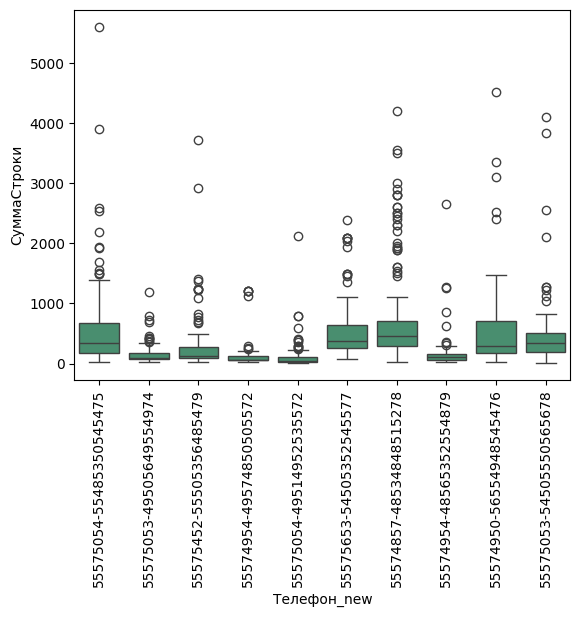

In [166]:
#топ 10 клиентов по числу заказов:
top_clients = df['Телефон_new'].value_counts().nlargest(10).index
df_top = df[df['Телефон_new'].isin(top_clients)]

sns.boxplot(x='Телефон_new', y='СуммаСтроки', color='#3D9970', data=df_top)
plt.xticks(rotation=90)
plt.show()

Данные для сегментации

In [216]:
df_clean = df_paid10.copy()
df_clean.to_csv('df_clean.csv', index=False)

In [168]:
df = df_clean
df = df.reset_index(drop=True)

In [169]:
df.head()

,НомерЗаказаНаСайте,ФормаОплаты,Регион,Группа1,Группа2,Группа3,Тип,Номенклатура,ТипТовара,Количество,Цена,СуммаСтроки,Маржа,Телефон_new
0,3999117_TR,Безналичная,Уральский ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,1.0,379.0,379.0,169.20,55575453-56535648535679
1,3999411_TR,Безналичная,Приволжский ф.о.,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,1.0,199.0,199.0,120.00,55574854-56495552515179
2,3999713_TR,Безналичная,Центральный ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,1.0,349.0,349.0,105.91,55574948-52515357485779
3,3999713_TR,Безналичная,Центральный ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,1.0,349.0,349.0,105.91,55574948-52515357485779
4,3999713_TR,Безналичная,Центральный ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),рубашки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя, р. 3 г",МГТ,1.0,449.0,449.0,142.72,55574948-52515357485779


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174918 entries, 0 to 174917
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   НомерЗаказаНаСайте  174918 non-null  object 
 1   ФормаОплаты         174918 non-null  object 
 2   Регион              174918 non-null  object 
 3   Группа1             174918 non-null  object 
 4   Группа2             174918 non-null  object 
 5   Группа3             174918 non-null  object 
 6   Тип                 174918 non-null  object 
 7   Номенклатура        174918 non-null  object 
 8   ТипТовара           174918 non-null  object 
 9   Количество          174918 non-null  float64
 10  Цена                174918 non-null  float64
 11  СуммаСтроки         174918 non-null  float64
 12  Маржа               174458 non-null  float64
 13  Телефон_new         174918 non-null  object 
dtypes: float64(4), object(10)
memory usage: 18.7+ MB


In [171]:
#группировка
group_ФормаОплаты = df.groupby(['Телефон_new', 'ФормаОплаты']).sum()
group_Регион = df.groupby(['Телефон_new', 'Регион']).sum()
group_Группа1 = df.groupby(['Телефон_new', 'Группа1']).sum()

In [172]:
#группировка по среднему и количетсву
group_Телефон_mean = df.groupby('Телефон_new')[df.select_dtypes(include='number').columns].mean()
group_Телефон_count = df.groupby(['Телефон_new']).count()

In [173]:
#создаем новыцй датафрейм для информации о клиентах
data_clients = pd.DataFrame()
data_clients['id'] = df.drop_duplicates(subset = 'Телефон_new')['Телефон_new']
data_clients = data_clients.reset_index(drop=True)

In [174]:
data_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27544 entries, 0 to 27543
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27544 non-null  object
dtypes: object(1)
memory usage: 215.3+ KB


In [175]:
#добавляем столбцы для распредения категорий

for i in df.Группа1.unique():
    data_clients[i] = i
    data_clients = data_clients.merge(group_Группа1['Количество'], left_on = ['id', i], right_on = ['Телефон_new', 'Группа1'], how = 'left')
    data_clients = data_clients.drop(columns = [i])
    data_clients = data_clients.rename(columns = {'Количество': i})
    data_clients = data_clients.fillna(0)

for i in df.ФормаОплаты.unique():
    data_clients[i] = i
    data_clients = data_clients.merge(group_ФормаОплаты['Количество'], left_on = ['id', i], right_on = ['Телефон_new', 'ФормаОплаты'], how = 'left')
    data_clients = data_clients.drop(columns = [i])
    data_clients = data_clients.rename(columns = {'Количество': i})
    data_clients = data_clients.fillna(0)

for i in df.Регион.unique():
    data_clients[i] = i
    data_clients = data_clients.merge(group_Регион['Количество'], left_on = ['id', i], right_on = ['Телефон_new', 'Регион'], how = 'left')
    data_clients = data_clients.drop(columns = [i])
    data_clients = data_clients.rename(columns = {'Количество': i})
    data_clients = data_clients.fillna(0)

In [176]:
#добавляем основные столбцы с итогами и количеством элементов
data_clients = data_clients.merge(df.groupby(['Телефон_new']).sum(), left_on = ['id'], right_on = ['Телефон_new'], how = 'left')

In [177]:
data_clients.head()

,id,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ,Безналичная,Наличная,Уральский ф.о.,Приволжский ф.о.,Центральный ф.о.,Южный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,НомерЗаказаНаСайте,ФормаОплаты,Регион,Группа1,Группа2,Группа3,Тип,Номенклатура,ТипТовара,Количество,Цена,СуммаСтроки,Маржа
0,55575453-56535648535679,3.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3999117_TR3999117_TR3999117_TR3999117_TR399911...,БезналичнаяБезналичнаяБезналичнаяБезналичнаяБе...,Уральский ф.о.Уральский ф.о.Уральский ф.о.Урал...,"ТЕКСТИЛЬ, ТРИКОТАЖКАНЦТОВАРЫ, КНИГИ, ДИСКИТЕКС...",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)ПОЛИГРАФИЧЕС...,бодиобучающие книги для детейкомплекты (майка+...,ОДЕЖДАИГРУШКИОДЕЖДАОДЕЖДАППКПИГРУШКИИГРУШКИ,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТМГТМГТМГТМГТМГТМГТ,10.0,2052.0,3759.0,811.39
1,55574854-56495552515179,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3999411_TR3999411_TR3999411_TR3999411_TR,БезналичнаяБезналичнаяБезналичнаяБезналичная,Приволжский ф.о.Приволжский ф.о.Приволжский ф....,ИГРУШКИТОВАРЫ ДЛЯ КОРМЛЕНИЯИГРУШКИТОВАРЫ ДЛЯ К...,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙПОСУДАИГРУШКИ ДЛЯ ...,"игрушки для ваннойпоильники, чашкиигрушки для ...",ИГРУШКИППКПИГРУШКИППКП,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)LUBBY, П...",МГТМГТМГТМГТ,4.0,528.0,528.0,204.07
2,55574948-52515357485779,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,3999713_TR3999713_TR3999713_TR4071825_TR407182...,БезналичнаяБезналичнаяБезналичнаяБезналичнаяБе...,Центральный ф.о.Центральный ф.о.Центральный ф....,"ТЕКСТИЛЬ, ТРИКОТАЖТЕКСТИЛЬ, ТРИКОТАЖТЕКСТИЛЬ, ...",ДЕТСКАЯ ОДЕЖДА (2-6 лет)ДЕТСКАЯ ОДЕЖДА (2-6 ле...,футболкифутболкирубашкибриджибриджифутболки,ОДЕЖДАОДЕЖДАОДЕЖДАОДЕЖДАОДЕЖДАОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3...",МГТМГТМГТМГТМГТМГТ,6.0,2196.0,2196.0,758.91
3,55574851-55504856515370,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,4000115_TR4000115_TR4000115_TR4000115_TR400011...,БезналичнаяБезналичнаяБезналичнаяБезналичнаяБе...,Центральный ф.о.Центральный ф.о.Центральный ф....,"ТЕКСТИЛЬ, ТРИКОТАЖКОСМЕТИКА/ГИГИЕНАТОВАРЫ ДЛЯ ...",ПОСТЕЛЬНОЕ БЕЛЬЕДЕТСКАЯ КОСМЕТИКАЭЛЕКТРОПРИБОР...,комплекты для купаниямылоподогревателибутылочк...,ОДЕЖДАППКПППКПППКПППКПППКПППКП,"LEADER KIDS, ПОЛОТЕНЦЕ с уголком, (бел)УШАСТЫЙ...",МГТМГТМГТМГТМГТМГТМГТ,7.0,13550.0,13550.0,2628.51
4,55574948-52504948534879,4.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,4000127_TR4000127_TR4000127_TR4000127_TR400012...,БезналичнаяБезналичнаяБезналичнаяБезналичнаяБе...,Центральный ф.о.Центральный ф.о.Центральный ф....,"ТЕКСТИЛЬ, ТРИКОТАЖТЕКСТИЛЬ, ТРИКОТАЖТЕКСТИЛЬ, ...",ДЕТСКОЕ БЕЛЬЁОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет...,трусылеггинсыфутболкиплатьяподгузникиЗАМЕНИТЕЛ...,ОДЕЖДАОДЕЖДАОДЕЖДАОДЕЖДАППКПППКПППКПППКПППКП,"LEADER KIDS, ТРУСЫ Сладкая вишня, (набивка), р...",МГТМГТМГТМГТМГТМГТМГТМГТМГТ,9.0,6239.0,6239.0,1510.13


In [178]:
df.Группа1.unique()

array(['ТЕКСТИЛЬ, ТРИКОТАЖ', 'ИГРУШКИ', 'КРУПНОГАБАРИТНЫЙ ТОВАР',
       'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ПОДГУЗНИКИ', 'ОБУВЬ', 'КОСМЕТИКА/ГИГИЕНА',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ',
       'ДЕТСКОЕ ПИТАНИЕ'], dtype=object)

In [179]:
data_clients = data_clients.drop(columns=['СуммаСтроки', 'Цена', 'Регион', 'НомерЗаказаНаСайте', 'ФормаОплаты', 'Группа1', 'Группа2', 'Группа3', 'ТипТовара', 'Тип', 'Номенклатура'])

In [180]:
data_clients = data_clients.merge(df.groupby(['Телефон_new', 'НомерЗаказаНаСайте']).sum()['СуммаСтроки'].groupby('Телефон_new').count(), left_on = ['id'], right_on = ['Телефон_new'], how = 'left')

In [181]:
data_clients = data_clients.rename(columns={'СуммаСтроки':'КОЛ-ВО ЧЕКОВ'})

In [182]:
# среднее число товаров в чеке
data_clients['СРЕД.КОЛ.ТОВ.вЧеке'] = data_clients['Количество'] / data_clients['КОЛ-ВО ЧЕКОВ']

In [183]:
# добавляем колонку со средним чеком
data_clients = data_clients.merge(df.groupby(['Телефон_new', 'НомерЗаказаНаСайте']).sum()['СуммаСтроки'].groupby('Телефон_new').mean(), left_on = ['id'], right_on = ['Телефон_new'], how = 'left')
data_clients = data_clients.rename(columns={'СуммаСтроки':'СРЕДНИЙ ЧЕК'})

In [184]:
#заполняем дробями 
data_clients['ТЕКСТИЛЬ, ТРИКОТАЖ'] = data_clients['ТЕКСТИЛЬ, ТРИКОТАЖ'] / data_clients['Количество']
data_clients['ИГРУШКИ'] = data_clients['ИГРУШКИ'] / data_clients['Количество']
data_clients['КРУПНОГАБАРИТНЫЙ ТОВАР'] = data_clients['КРУПНОГАБАРИТНЫЙ ТОВАР'] / data_clients['Количество']
data_clients['СОПУТСТВУЮЩИЕ ТОВАРЫ'] = data_clients['СОПУТСТВУЮЩИЕ ТОВАРЫ'] / data_clients['Количество']
data_clients['ПОДГУЗНИКИ'] = data_clients['ПОДГУЗНИКИ'] / data_clients['Количество']
data_clients['ОБУВЬ'] = data_clients['ОБУВЬ'] / data_clients['Количество']
data_clients['КОСМЕТИКА/ГИГИЕНА'] = data_clients['КОСМЕТИКА/ГИГИЕНА'] / data_clients['Количество']
data_clients['КАНЦТОВАРЫ, КНИГИ, ДИСКИ'] = data_clients['КАНЦТОВАРЫ, КНИГИ, ДИСКИ'] / data_clients['Количество']
data_clients['ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'] = data_clients['ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'] / data_clients['Количество']
data_clients['ДЕТСКОЕ ПИТАНИЕ'] = data_clients['ДЕТСКОЕ ПИТАНИЕ'] / data_clients['Количество']

In [185]:
data_clients.head()

,id,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ,Безналичная,Наличная,Уральский ф.о.,Приволжский ф.о.,Центральный ф.о.,Южный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,Количество,Маржа,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК
0,55575453-56535648535679,0.300000,0.1,0.0,0.0,0.300000,0.0,0.000000,0.3,0.000000,0.000000,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,811.39,1,10.0,3759.0
1,55574854-56495552515179,0.000000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.500000,0.000000,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,204.07,1,4.0,528.0
2,55574948-52515357485779,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,758.91,2,3.0,1098.0
3,55574851-55504856515370,0.142857,0.0,0.0,0.0,0.000000,0.0,0.428571,0.0,0.428571,0.000000,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,2628.51,1,7.0,13550.0
4,55574948-52504948534879,0.444444,0.0,0.0,0.0,0.222222,0.0,0.111111,0.0,0.000000,0.222222,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0,1510.13,2,4.5,3119.5


In [186]:
df1 = data_clients.copy()

In [187]:
df = df1

In [188]:
df.set_index('id', inplace = True)

In [189]:
data_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27544 entries, 0 to 27543
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27544 non-null  object 
 1   ТЕКСТИЛЬ, ТРИКОТАЖ        27544 non-null  float64
 2   ИГРУШКИ                   27544 non-null  float64
 3   КРУПНОГАБАРИТНЫЙ ТОВАР    27544 non-null  float64
 4   СОПУТСТВУЮЩИЕ ТОВАРЫ      27544 non-null  float64
 5   ПОДГУЗНИКИ                27544 non-null  float64
 6   ОБУВЬ                     27544 non-null  float64
 7   КОСМЕТИКА/ГИГИЕНА         27544 non-null  float64
 8   КАНЦТОВАРЫ, КНИГИ, ДИСКИ  27544 non-null  float64
 9   ТОВАРЫ ДЛЯ КОРМЛЕНИЯ      27544 non-null  float64
 10  ДЕТСКОЕ ПИТАНИЕ           27544 non-null  float64
 11  Безналичная               27544 non-null  float64
 12  Наличная                  27544 non-null  float64
 13  Уральский ф.о.            27544 non-null  float64
 14  Привол

In [190]:
data_clients.to_csv('data_clients.csv', index=False)

Correlation

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.context('seaborn');

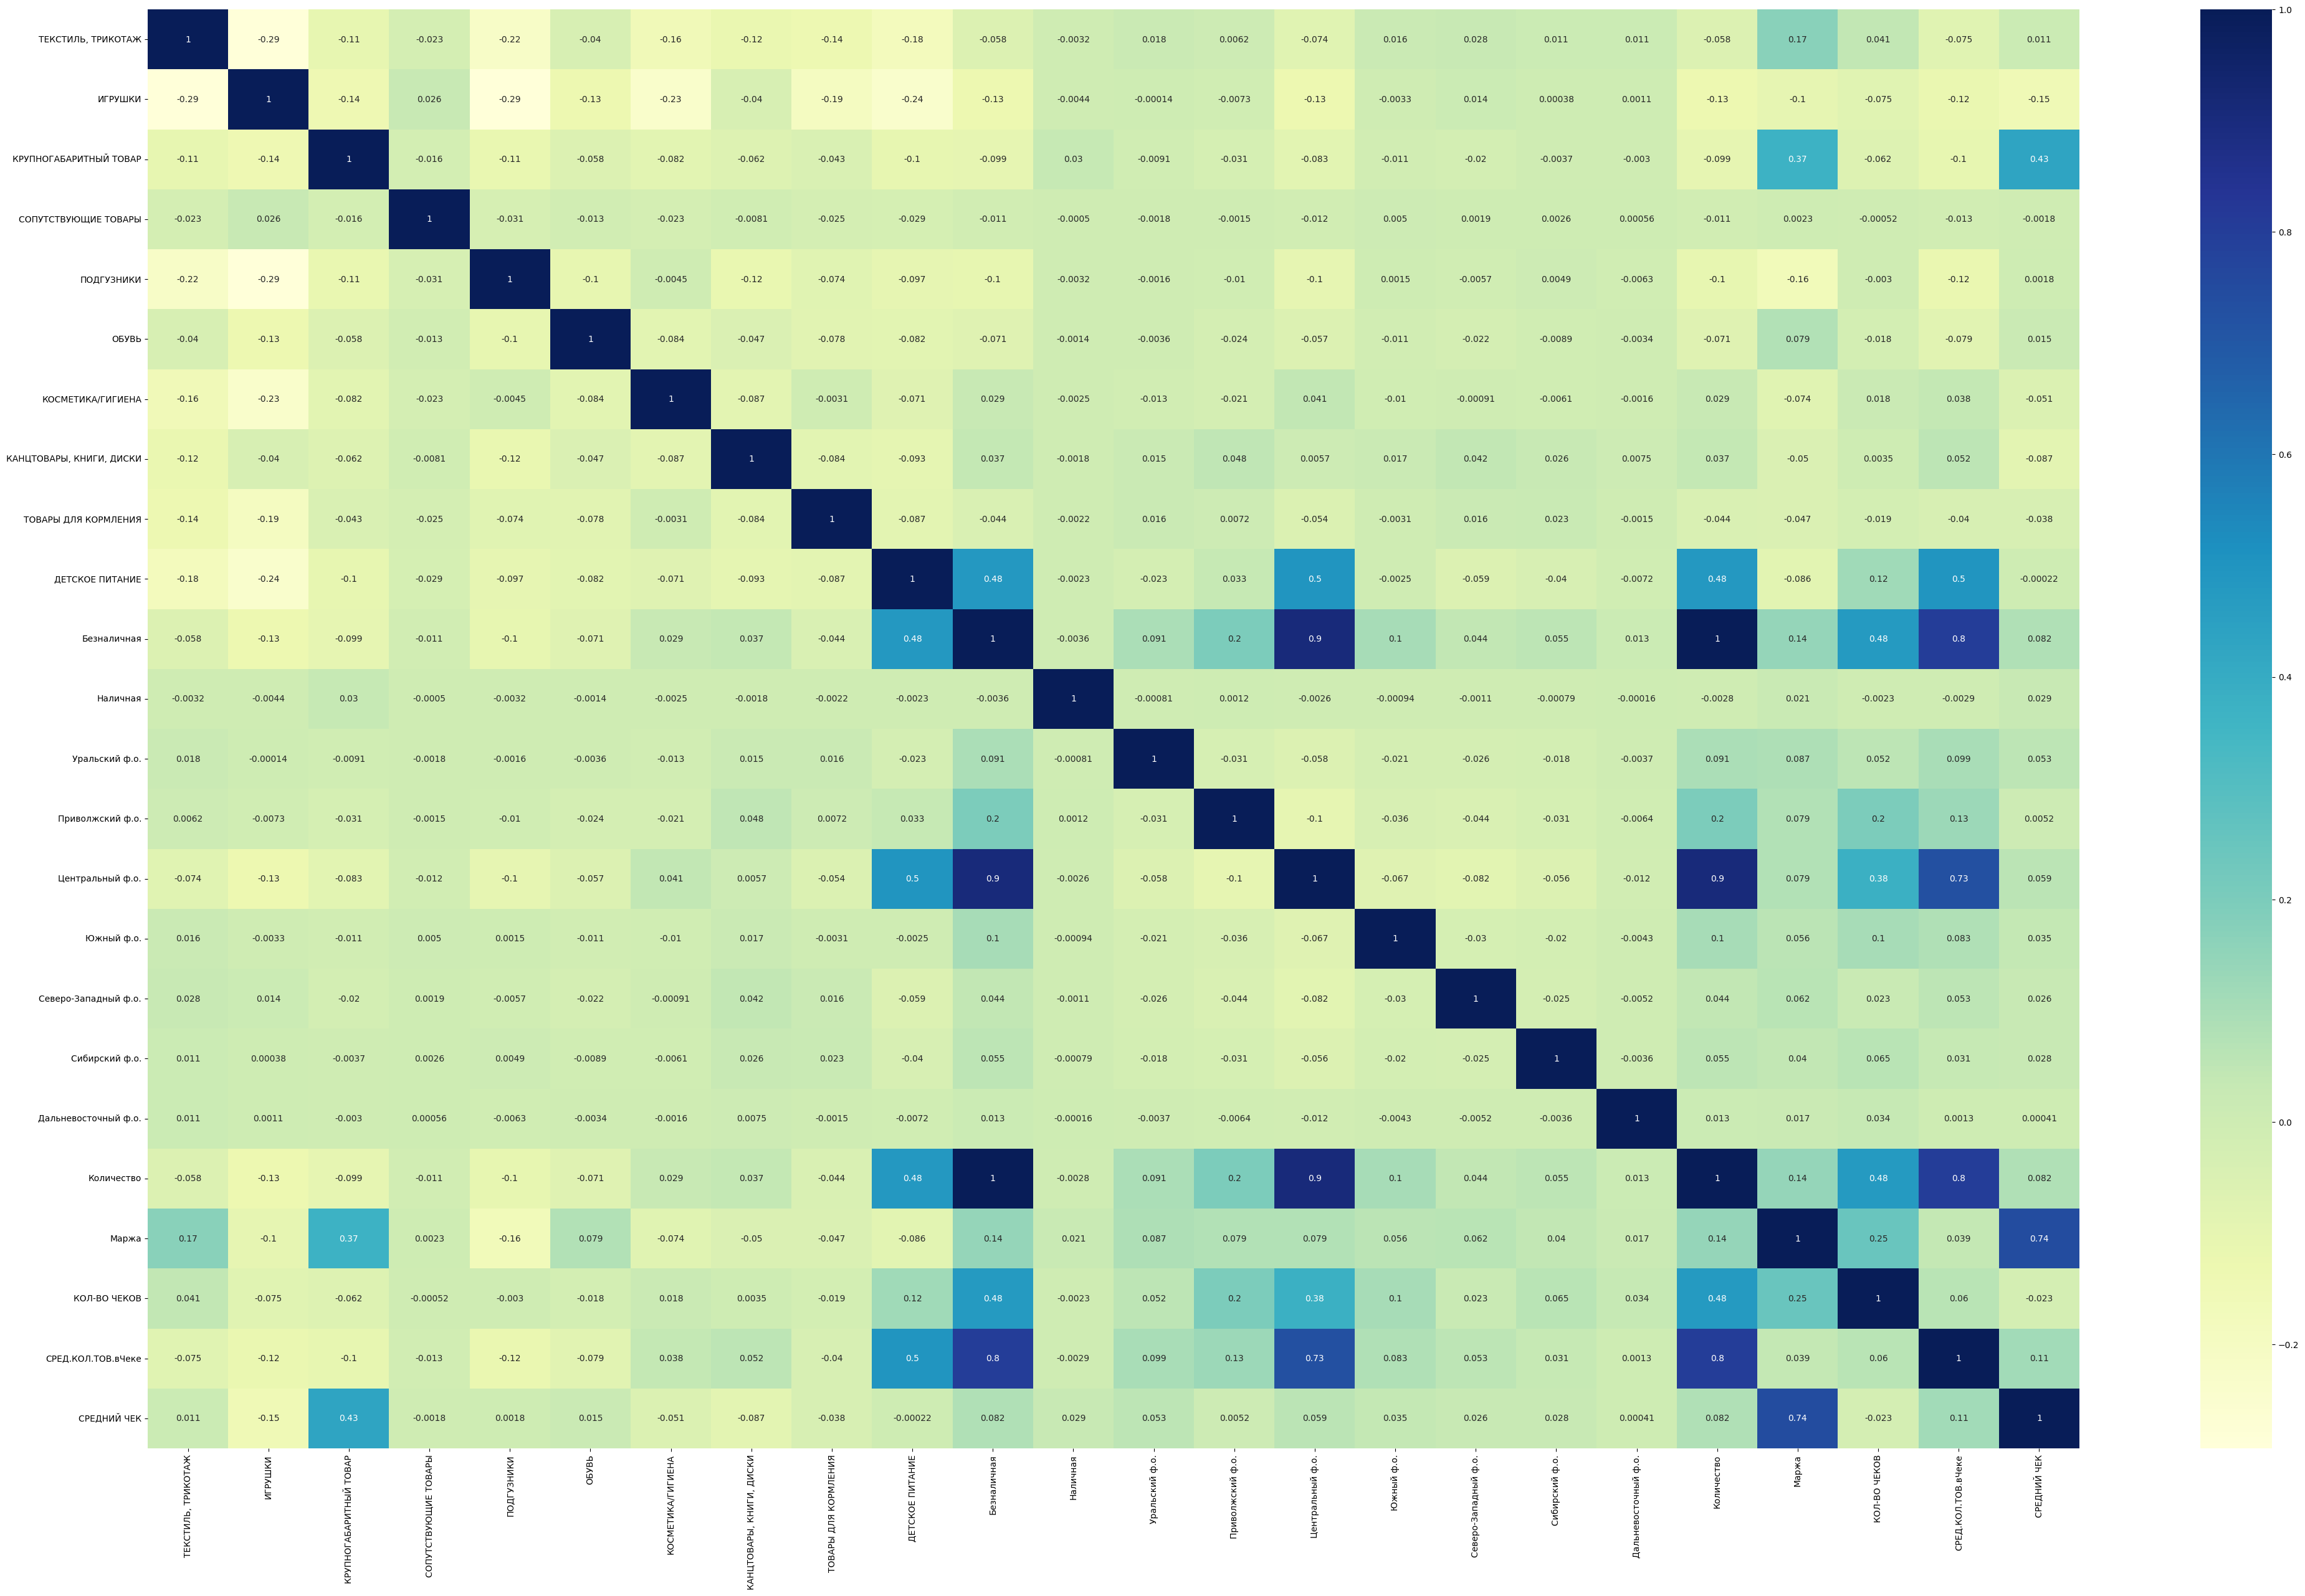

In [192]:
fig = plt.figure(figsize = (50, 30))
sns.heatmap(df.corr(), annot=True , cmap = 'YlGnBu');

In [193]:
corr = df.select_dtypes(include='number').corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ,Безналичная,Наличная,Уральский ф.о.,Приволжский ф.о.,Центральный ф.о.,Южный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,Количество,Маржа,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК
"ТЕКСТИЛЬ, ТРИКОТАЖ",1.00,-0.24,-0.05,0.00,-0.20,0.07,-0.09,-0.07,-0.07,-0.13,0.11,-0.00,0.02,0.01,0.00,0.01,0.02,0.01,0.01,0.11,0.36,0.15,0.07,0.07
ИГРУШКИ,-0.24,1.00,-0.10,0.06,-0.31,-0.10,-0.21,0.11,-0.17,-0.20,-0.03,-0.01,-0.00,0.05,-0.07,-0.01,0.03,-0.00,0.00,-0.03,-0.01,0.02,-0.04,-0.19
КРУПНОГАБАРИТНЫЙ ТОВАР,-0.05,-0.10,1.00,-0.01,-0.07,-0.04,0.00,-0.03,0.06,-0.07,-0.03,0.02,0.01,-0.00,-0.02,0.02,-0.01,0.02,0.00,-0.03,0.37,0.04,-0.06,0.29
СОПУТСТВУЮЩИЕ ТОВАРЫ,0.00,0.06,-0.01,1.00,-0.03,0.01,-0.01,0.04,-0.02,-0.02,0.06,-0.00,0.00,-0.00,0.02,0.01,0.00,-0.00,0.00,0.06,0.04,0.05,0.05,0.01
ПОДГУЗНИКИ,-0.20,-0.31,-0.07,-0.03,1.00,-0.12,0.20,-0.10,0.07,0.10,0.10,-0.00,0.01,0.03,0.02,0.02,-0.00,-0.00,0.01,0.10,-0.19,0.16,0.05,0.23
ОБУВЬ,0.07,-0.10,-0.04,0.01,-0.12,1.00,-0.08,0.00,-0.08,-0.06,-0.01,-0.00,0.01,-0.02,0.00,0.01,-0.02,-0.01,-0.00,-0.01,0.21,0.09,-0.06,0.09
КОСМЕТИКА/ГИГИЕНА,-0.09,-0.21,0.00,-0.01,0.20,-0.08,1.00,-0.04,0.20,0.12,0.31,-0.00,-0.04,-0.06,0.23,-0.03,-0.03,-0.03,0.01,0.31,-0.03,0.17,0.29,0.03
"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",-0.07,0.11,-0.03,0.04,-0.10,0.00,-0.04,1.00,-0.05,-0.04,0.20,-0.00,-0.00,0.01,0.06,0.00,0.01,-0.01,0.01,0.20,0.02,0.12,0.19,-0.10
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,-0.07,-0.17,0.06,-0.02,0.07,-0.08,0.20,-0.05,1.00,0.06,0.19,-0.00,0.01,0.02,0.06,-0.00,0.01,0.01,0.01,0.19,0.02,0.14,0.16,0.02
ДЕТСКОЕ ПИТАНИЕ,-0.13,-0.20,-0.07,-0.02,0.10,-0.06,0.12,-0.04,0.06,1.00,0.43,-0.00,-0.09,-0.08,0.42,-0.07,-0.10,-0.08,-0.01,0.43,-0.08,0.19,0.43,0.10


In [194]:
df = df.drop(['Количество'], axis=1)

In [195]:
corr = df.select_dtypes(include='number').corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ,Безналичная,Наличная,Уральский ф.о.,Приволжский ф.о.,Центральный ф.о.,Южный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,Маржа,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК
"ТЕКСТИЛЬ, ТРИКОТАЖ",1.00,-0.24,-0.05,0.00,-0.20,0.07,-0.09,-0.07,-0.07,-0.13,0.11,-0.00,0.02,0.01,0.00,0.01,0.02,0.01,0.01,0.36,0.15,0.07,0.07
ИГРУШКИ,-0.24,1.00,-0.10,0.06,-0.31,-0.10,-0.21,0.11,-0.17,-0.20,-0.03,-0.01,-0.00,0.05,-0.07,-0.01,0.03,-0.00,0.00,-0.01,0.02,-0.04,-0.19
КРУПНОГАБАРИТНЫЙ ТОВАР,-0.05,-0.10,1.00,-0.01,-0.07,-0.04,0.00,-0.03,0.06,-0.07,-0.03,0.02,0.01,-0.00,-0.02,0.02,-0.01,0.02,0.00,0.37,0.04,-0.06,0.29
СОПУТСТВУЮЩИЕ ТОВАРЫ,0.00,0.06,-0.01,1.00,-0.03,0.01,-0.01,0.04,-0.02,-0.02,0.06,-0.00,0.00,-0.00,0.02,0.01,0.00,-0.00,0.00,0.04,0.05,0.05,0.01
ПОДГУЗНИКИ,-0.20,-0.31,-0.07,-0.03,1.00,-0.12,0.20,-0.10,0.07,0.10,0.10,-0.00,0.01,0.03,0.02,0.02,-0.00,-0.00,0.01,-0.19,0.16,0.05,0.23
ОБУВЬ,0.07,-0.10,-0.04,0.01,-0.12,1.00,-0.08,0.00,-0.08,-0.06,-0.01,-0.00,0.01,-0.02,0.00,0.01,-0.02,-0.01,-0.00,0.21,0.09,-0.06,0.09
КОСМЕТИКА/ГИГИЕНА,-0.09,-0.21,0.00,-0.01,0.20,-0.08,1.00,-0.04,0.20,0.12,0.31,-0.00,-0.04,-0.06,0.23,-0.03,-0.03,-0.03,0.01,-0.03,0.17,0.29,0.03
"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",-0.07,0.11,-0.03,0.04,-0.10,0.00,-0.04,1.00,-0.05,-0.04,0.20,-0.00,-0.00,0.01,0.06,0.00,0.01,-0.01,0.01,0.02,0.12,0.19,-0.10
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,-0.07,-0.17,0.06,-0.02,0.07,-0.08,0.20,-0.05,1.00,0.06,0.19,-0.00,0.01,0.02,0.06,-0.00,0.01,0.01,0.01,0.02,0.14,0.16,0.02
ДЕТСКОЕ ПИТАНИЕ,-0.13,-0.20,-0.07,-0.02,0.10,-0.06,0.12,-0.04,0.06,1.00,0.43,-0.00,-0.09,-0.08,0.42,-0.07,-0.10,-0.08,-0.01,-0.08,0.19,0.43,0.10


In [196]:
data_for_clusters = df

In [197]:
df1 = data_for_clusters.copy()

In [198]:
df1.head()

,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ,Безналичная,Наличная,Уральский ф.о.,Приволжский ф.о.,Центральный ф.о.,Южный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,Маржа,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК
id,,,,,,,,,,,,,,,,,,,,,,,
55575453-56535648535679,0.300000,0.1,0.0,0.0,0.300000,0.0,0.000000,0.3,0.000000,0.000000,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,811.39,1,10.0,3759.0
55574854-56495552515179,0.000000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.500000,0.000000,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,204.07,1,4.0,528.0
55574948-52515357485779,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,758.91,2,3.0,1098.0
55574851-55504856515370,0.142857,0.0,0.0,0.0,0.000000,0.0,0.428571,0.0,0.428571,0.000000,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2628.51,1,7.0,13550.0
55574948-52504948534879,0.444444,0.0,0.0,0.0,0.222222,0.0,0.111111,0.0,0.000000,0.222222,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,1510.13,2,4.5,3119.5


Remove outliers

In [199]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np

In [200]:
df1.shape

(27544, 23)

In [201]:
#вычисляем выбросы
iso = IsolationForest(
        n_estimators=200,
        contamination=0.02,
        random_state=7,
        n_jobs=-1)

is_outlier = iso.fit_predict(df1.values) == -1

print(f'Remove {is_outlier.mean():.2%} points')

Remove 2.00% points


In [202]:
df1 = df1.loc[~is_outlier]

In [203]:
df1.shape

(26993, 23)

In [204]:
df1.to_csv('data_for_clusters.csv')